<a href="https://colab.research.google.com/github/ananyag27/Deep-Learning/blob/main/LAB01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Data Types:
Filename        object
Class Label      int64
f0             float64
f1             float64
f2             float64
                ...   
f195           float64
f196           float64
f197           float64
f198           float64
f199           float64
Length: 202, dtype: object

Missing Values:
Series([], dtype: int64)

Missing Values After Imputation:
0

Class Balance:
Class Label
1.0    1634
0.0    1055
2.0     564
Name: count, dtype: int64


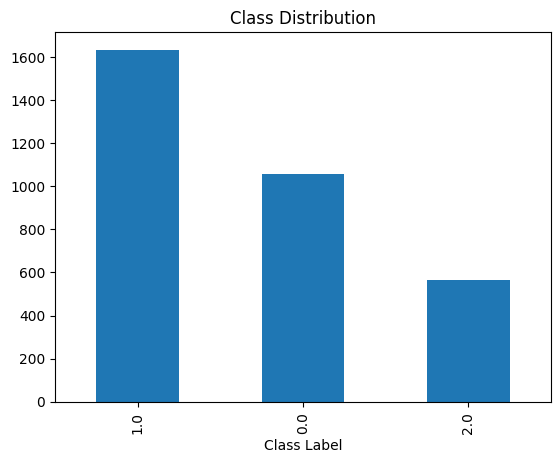


Correlation Matrix:


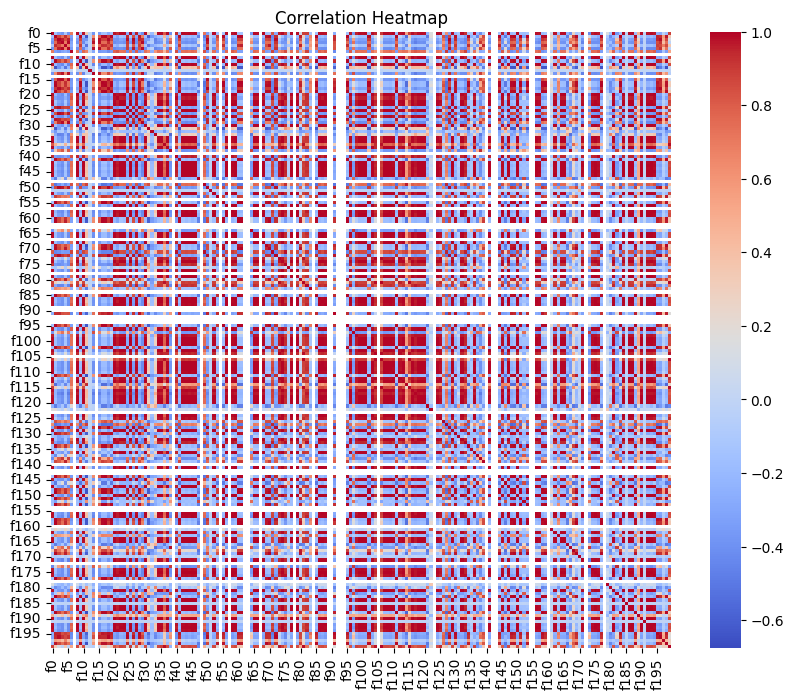


Matrix Rank:
Matrix Rank: 174

Data Range Before Normalization:
            f0          f1          f2          f3          f4          f5  \
min    0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
max  781.78949  459.207794  536.879639  760.753845  202.598496  587.289551   

            f6   f7           f8          f9  ...         f190      f191  \
min    0.00000  0.0      0.00000    0.000000  ...     0.000000  0.000000   
max  217.98201  0.0  10129.19336  260.783539  ...  7535.423828  0.341233   

            f192         f193         f194        f195        f196       f197  \
min     0.000000     0.000000     0.000000    0.000000    0.000000   0.000000   
max  5972.883789  6563.629883  5749.376465  750.316284  571.680176  31.048813   

           f198        f199  
min    0.000000     0.00000  
max  505.643402  1758.73584  

[2 rows x 200 columns]

Data Range After Normalization:
      f0   f1   f2   f3   f4   f5   f6   f7   f8   f9  ...  f190  f191  f192  \


In [10]:
#A1 Perform exploratory data analysis on the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import matrix_rank
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Load the dataset
data_path = '/content/Custom_CNN_Features.csv'
df = pd.read_csv(data_path)

# 1. Data types of attributes
print("\nData Types:")
print(df.dtypes)

# 2. Checking for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Imputation for missing values (using mean for numerical columns)
numerical_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Verify missing values after imputation
print("\nMissing Values After Imputation:")
print(df.isnull().sum().sum())

# 3. Class balance analysis
print("\nClass Balance:")
if 'Class Label' in df.columns:
    class_counts = df['Class Label'].value_counts()
    print(class_counts)
    class_counts.plot(kind='bar', title='Class Distribution')
    plt.show()
else:
    print("No 'Class Label' column found in the dataset.")

# 4. Correlation matrix and heatmap
print("\nCorrelation Matrix:")
numeric_data = df.drop(columns=['Filename', 'Class Label'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# 5. Matrix rank (dimensionality study)
print("\nMatrix Rank:")
rank = matrix_rank(numeric_data.values)
print(f"Matrix Rank: {rank}")

# 6. Data range and normalization
print("\nData Range Before Normalization:")
data_ranges = numeric_data.agg(['min', 'max'])
print(data_ranges)

# Applying Min-Max Normalization
scaler = MinMaxScaler()
numeric_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)
df[numeric_data.columns] = numeric_data

print("\nData Range After Normalization:")
data_ranges_normalized = numeric_data.agg(['min', 'max'])
print(data_ranges_normalized)


# Save the cleaned and normalized dataset
df.to_csv('/content/Cleaned_Normalized_Dataset.csv', index=False)
print("\nCleaned and normalized dataset saved as 'Cleaned_Normalized_Dataset.csv'.")


In [14]:
#A2 Split the set into train & test sets with 75:25 split. Use various classifiers (kNN, Decision Tree, Support Vector Machines, Random Forest, Naïve-Bayes etc.) for classification of the dataset. Study the resultsof classification with accuracy, Precision, Recall, F1-Score & AUROC metrics.
# Splitting the dataset into train and test sets
if 'Class Label' in df.columns:
    # Separate features and target
    X = df.drop(columns=['Filename', 'Class Label'])
    y = df['Class Label']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Classifiers
    classifiers = {
        'kNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'SVM': SVC(probability=True),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }

    results = []

    for name, clf in classifiers.items():
        # Train classifier
        clf.fit(X_train, y_train)

        # Predict on the test set
        y_pred = clf.predict(X_test)

        # Predict probabilities (if available)
        y_prob = clf.predict_proba(X_test) if hasattr(clf, 'predict_proba') else None

        # Compute evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Handle AUROC for multiclass
        if y_prob is not None:
            auroc = roc_auc_score(
                y_test,
                y_prob,
                multi_class='ovr',
                average='weighted'
            )
        else:
            auroc = 'N/A'

        # Append results
        results.append((name, accuracy, precision, recall, f1, auroc))

        # Detailed classification report
        print(f"\n{name} Classification Report:\n")
        print(classification_report(y_test, y_pred))

    # Summary results
    results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUROC'])
    print("\nSummary Results:")
    print(results_df)
else:
    print("No 'Class Label' column found in the dataset.")



kNN Classification Report:

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       288
         1.0       0.90      0.97      0.93       376
         2.0       0.99      0.93      0.96       150

    accuracy                           0.93       814
   macro avg       0.95      0.93      0.94       814
weighted avg       0.94      0.93      0.93       814


Decision Tree Classification Report:

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92       288
         1.0       0.90      0.93      0.91       376
         2.0       0.95      0.91      0.93       150

    accuracy                           0.92       814
   macro avg       0.93      0.92      0.92       814
weighted avg       0.92      0.92      0.92       814


SVM Classification Report:

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.92       288
         1.0       0.89      0.9

In [16]:
#A3 Check if the models have underfit, regular fit or overfit from the trainset and test set metrics.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Initialize storage for metrics
fit_results = []

for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predictions and probabilities for train set
    y_train_pred = clf.predict(X_train)

    # Get probabilities for all classes
    y_train_prob = clf.predict_proba(X_train) if hasattr(clf, 'predict_proba') else None

    # Train metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Check if AUROC should be calculated differently based on the classification task
    # Now using num of classes (unique values in target)
    if y_train_prob is not None:
        if len(np.unique(y_train)) == 2:  # Binary classification
            train_auroc = roc_auc_score(y_train, y_train_prob[:, 1]) # Assuming probability for positive class
        else:  # Multi-class classification
            train_auroc = roc_auc_score(y_train, y_train_prob, average='weighted', multi_class='ovr')
    else:
        train_auroc = 'N/A'

    # Predictions and probabilities for test set
    y_test_pred = clf.predict(X_test)
    # Get probabilities for all classes
    y_test_prob = clf.predict_proba(X_test) if hasattr(clf, 'predict_proba') else None

    # Test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Check if AUROC should be calculated differently based on the classification task
    # Now using num of classes (unique values in target)
    if y_test_prob is not None:
        if len(np.unique(y_train)) == 2:  # Binary classification
            test_auroc = roc_auc_score(y_test, y_test_prob[:, 1])  # Assuming probability for positive class
        else:  # Multi-class classification
            test_auroc = roc_auc_score(y_test, y_test_prob, average='weighted', multi_class='ovr')
    else:
        test_auroc = 'N/A'

    # Store metrics
    fit_results.append({
        'Classifier': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train F1-Score': train_f1,
        'Test F1-Score': test_f1,
        'Train AUROC': train_auroc,
        'Test AUROC': test_auroc
    })

# Convert results to a DataFrame
fit_results_df = pd.DataFrame(fit_results)

# Analyze fit results
print("\nFitting Analysis Results:")
print(fit_results_df)

# Check for underfitting or overfitting
for index, row in fit_results_df.iterrows():
    classifier = row['Classifier']
    train_acc = row['Train Accuracy']
    test_acc = row['Test Accuracy']

    if abs(train_acc - test_acc) < 0.05:
        print(f"{classifier}: Regular Fit")
    elif train_acc > test_acc + 0.1:
        print(f"{classifier}: Overfit")
    elif train_acc < test_acc - 0.1:
        print(f"{classifier}: Underfit")


Fitting Analysis Results:
      Classifier  Train Accuracy  Test Accuracy  Train F1-Score  \
0            kNN        0.943419       0.934889        0.943355   
1  Decision Tree        1.000000       0.918919        1.000000   
2            SVM        0.933579       0.931204        0.933368   
3  Random Forest        1.000000       0.939803        1.000000   
4    Naive Bayes        0.918409       0.922604        0.918482   

   Test F1-Score  Train AUROC  Test AUROC  
0       0.934978     0.992273    0.967509  
1       0.918980     1.000000    0.930808  
2       0.931355     0.973390    0.973726  
3       0.939851     1.000000    0.981619  
4       0.922782     0.958521    0.960983  
kNN: Regular Fit
SVM: Regular Fit
Naive Bayes: Regular Fit


In [17]:
#A4 Check the timings of training and classification by each model.
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'kNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Initialize a dictionary to store the results
timings = {}

# Loop through each model and check timings
for model_name, model in models.items():
    # Record training start time
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()

    # Record classification start time
    start_classify = time.time()
    y_pred = model.predict(X_test)
    end_classify = time.time()

    # Calculate timings
    train_time = end_train - start_train
    classify_time = end_classify - start_classify

    # Store the results
    timings[model_name] = {
        'Train Time (s)': train_time,
        'Classify Time (s)': classify_time,
        'Test Accuracy': accuracy_score(y_test, y_pred)
    }

# Print the timings
for model_name, timing_info in timings.items():
    print(f"{model_name}:")
    print(f"  Training Time: {timing_info['Train Time (s)']:.4f} seconds")
    print(f"  Classification Time: {timing_info['Classify Time (s)']:.4f} seconds")
    print(f"  Test Accuracy: {timing_info['Test Accuracy']:.4f}")
    print("-" * 40)


kNN:
  Training Time: 0.0329 seconds
  Classification Time: 0.3252 seconds
  Test Accuracy: 0.9303
----------------------------------------
Decision Tree:
  Training Time: 0.4152 seconds
  Classification Time: 0.0126 seconds
  Test Accuracy: 0.9037
----------------------------------------
SVM:
  Training Time: 0.2496 seconds
  Classification Time: 0.1998 seconds
  Test Accuracy: 0.9273
----------------------------------------
Random Forest:
  Training Time: 2.3101 seconds
  Classification Time: 0.0408 seconds
  Test Accuracy: 0.9334
----------------------------------------
Naive Bayes:
  Training Time: 0.0218 seconds
  Classification Time: 0.0147 seconds
  Test Accuracy: 0.9201
----------------------------------------
